In [1]:
# Part 1 - Data Preporcessing

In [2]:
#!wget https://sara-ml-sagemaker.s3.amazonaws.com/CNN/P14-Convolutional-Neural-Networks.zip
#!unzip P14-Convolutional-Neural-Networks.zip

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Building the CNN
#Importing Keras Library and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
# Initialising the CNN

In [6]:
model = Sequential()

In [7]:
# Step 1 Adding the Convolutional Layer

In [8]:
# border_mode = 'same' is defualt, so there is no need to add it. 
# I've added it here to indicate all the parameters needed. 
model.add(Convolution2D(32, (3, 3), border_mode = 'same', input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  app.launch_new_instance()


In [9]:
# Step 2 - Pooling

In [10]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
# Adding a second convolutional layer

In [12]:
model.add(Convolution2D(64, (3, 3), activation = 'relu'))

In [13]:
# Also add another Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
# Adding a Third convolutional layer

In [15]:
model.add(Convolution2D(128, (3, 3), activation = 'relu'))

In [16]:
# Also add another Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [17]:
# Adding a Fourth convolutional layer

In [18]:
model.add(Convolution2D(256, (3, 3), activation = 'relu'))

In [19]:
# Also add another Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [20]:
# Step 3 - Flatenning

In [21]:
model.add(Flatten())

In [22]:
# Step 4 Full connection - Adding the hidden layer (ANN)

In [23]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [24]:
# Compilling the CNN

In [25]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Input Images 
training_set = 'Convolutional_Neural_Networks/dataset/training_set'
test_set = 'Convolutional_Neural_Networks/dataset/test_set'

In [27]:
# Fitting the CNN to Images
from keras.preprocessing.image import ImageDataGenerator

In [28]:
# Image Augmentation is carried out by the ImageDataGenerator
# This exercise is carried out to distort the images so that training is carried out on all sorts of distorted images 
# to pick out the features inspite of distortions int he image
# which can then be used for predicting the test data.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
training_set = train_datagen.flow_from_directory(
        directory = training_set,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [31]:
test_set = test_datagen.flow_from_directory(
        directory = test_set,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

In [33]:
model.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=5,
        validation_data=test_set,
        validation_steps=2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
8000/8000 [==============================] - 2585s 323ms/step - loss: 0.3576 - acc: 0.8249 - val_loss: 0.4624 - val_acc: 0.8317
Epoch 2/5
8000/8000 [==============================] - 3269s 409ms/step - loss: 0.1121 - acc: 0.9557 - val_loss: 0.5786 - val_acc: 0.8484
Epoch 3/5
8000/8000 [==============================] - 3231s 404ms/step - loss: 0.0635 - acc: 0.9762 - val_loss: 0.6212 - val_acc: 0.8560
Epoch 4/5
8000/8000 [==============================] - 3273s 409ms/step - loss: 0.0450 - acc: 0.9834 - val_loss: 0.7417 - val_acc: 0.8540
Epoch 5/5
8000/8000 [==============================] - 3220s 403ms/step - loss: 0.0362 - acc: 0.9870 - val_loss: 0.8015 - val_acc: 0.8645


In [35]:
# Load Model

In [34]:
model.save('catsdogs.h5')

In [37]:
# Image Path

In [38]:
img_path = 'test1.jpg'

In [44]:
from keras.models import load_model
from keras.preprocessing import image

In [45]:
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('on')
        plt.show()

    return img_tensor

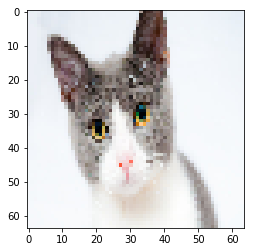

In [46]:
# load a single image
new_image = load_image(img_path)

In [47]:
# check prediction
pred = model.predict(new_image)

In [48]:
pred

array([[3.3912585e-11]], dtype=float32)

In [49]:
classes = model.predict_classes(new_image)

In [50]:
classes

array([[0]], dtype=int32)

In [57]:
generator = train_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/training_set', batch_size=32)

Found 8000 images belonging to 2 classes.


In [66]:
classes = generator.class_indices

In [67]:
classes

{'cats': 0, 'dogs': 1}

In [68]:
img_path2 = 'test2.jpg'

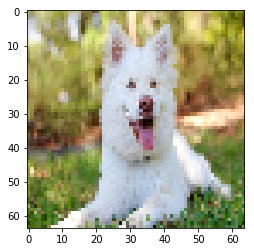

In [69]:
# load a single image
new_image2 = load_image(img_path2)

In [72]:
# check prediction
pred = model.predict(new_image2)

In [73]:
pred

array([[0.66852385]], dtype=float32)

In [74]:
classes = model.predict_classes(new_image2)

In [75]:
classes

array([[1]], dtype=int32)

In [76]:
img_path3 = 'test3.jpg'

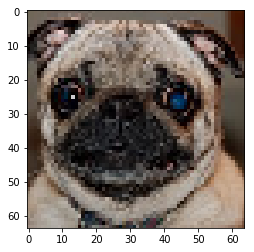

In [77]:
# load a single image
new_image3 = load_image(img_path3)

In [78]:
# check prediction
pred = model.predict(new_image3)

In [79]:
pred

array([[0.99999964]], dtype=float32)

In [80]:
classes = model.predict_classes(new_image3)

In [81]:
classes

array([[1]], dtype=int32)

In [82]:
classes = generator.class_indices

In [83]:
classes

{'cats': 0, 'dogs': 1}